In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from cv2 import cv2
from hydramuscle.reduced_model.reduced_fast_cell import ReducedFastCell
from hydramuscle.reduced_model.reduced_layer import ReducedLayer

In [45]:
layer = ReducedLayer(gc=100, stim_amp=50)

In [46]:
T = 0.2
dt = 0.001

In [47]:
for t in tqdm(np.arange(0, T, dt)):
    
    if 0 <= t <= 0.01:
        layer.step({(15, 30)})
    else:
        layer.step()

100%|██████████| 200/200 [00:04<00:00, 40.87it/s]


In [48]:
numx, numy = layer.layer.shape

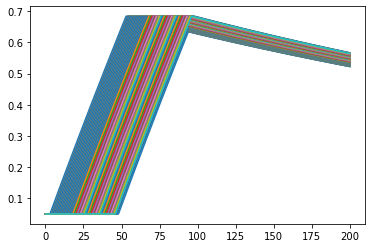

In [49]:
plt.figure()
for x in range(numx):
    for y in range(numy):
        plt.plot(layer.layer[x, y].c_train)
plt.show()

In [50]:
# Create data tensor
ca = [[None]*numy for _ in range(numx)]
v = [[None]*numy for _ in range(numx)]

for x in range(numx):
    for y in range(numy):
        ca[x][y] = layer.layer[x,y].c_train
        v[x][y] = layer.layer[x,y].v_train
        
ca = np.moveaxis(np.array(ca), 2, 0)
v = np.moveaxis(np.array(v), 2, 0)

In [77]:
# Save frames
dpi=100
save_interval = 1
for i, t in enumerate(np.arange(0, T, dt * save_interval)):
    frame = v[int(i * save_interval)]
    plt.clf()
    plt.imshow(np.flip(frame.T, 0),
               vmin=0,
               vmax=1)
    plt.text(1, 5, str(round(t, 2)) + 's', color='white', size=15, fontweight='bold')
    plt.colorbar()
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

    plt.savefig('../../results/video/frames/img' + str(i) + '.jpg', dpi=dpi, bbox_inches='tight')
    plt.close()

In [78]:
# Save video
fps = 10

fourcc = cv2.VideoWriter_fourcc(*'MJPG')
videoWriter = cv2.VideoWriter('../../results/video/reduced_fast/v_lif.avi', fourcc, fps, (246, 336))

for iframe in range(int(len(ca)/save_interval)):
    frame = cv2.imread('../../results/video/frames/img' + str(iframe) + '.jpg')
    videoWriter.write(frame)
videoWriter.release()
cv2.destroyAllWindows()